# Analysis of Historical Airplane Crashes

#### Data Set URL: https://www.kaggle.com/saurograndi/airplane-crashes-since-1908

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from datetime import date, timedelta, datetime
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
   


In [67]:
df = pd.read_csv("airplane_crashes_and_fatalities_since_1908.csv")

In [68]:
df.head(5)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,7/12/1912,6:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [69]:
df.shape

(5268, 13)

In [70]:
df.dtypes

Date             object
Time             object
Location         object
Operator         object
Flight #         object
Route            object
Type             object
Registration     object
cn/In            object
Aboard          float64
Fatalities      float64
Ground          float64
Summary          object
dtype: object

In [71]:
df.isnull().sum() 

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [72]:
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [73]:

loc_list = Counter(df['Location'].dropna()).most_common(20)
locs = []
crashes = []
for loc in loc_list:
    locs.append(loc[0])
    crashes.append(loc[1])
dangerous_locations = pd.DataFrame({'Crashes in this location' : crashes}, index=locs)

dangerous_locations

,Crashes in this location
"Sao Paulo, Brazil",15
"Moscow, Russia",15
"Rio de Janeiro, Brazil",14
"Bogota, Colombia",13
"Manila, Philippines",13
"Anchorage, Alaska",13
"New York, New York",12
"Cairo, Egypt",12
"Chicago, Illinois",11
"Near Moscow, Russia",9


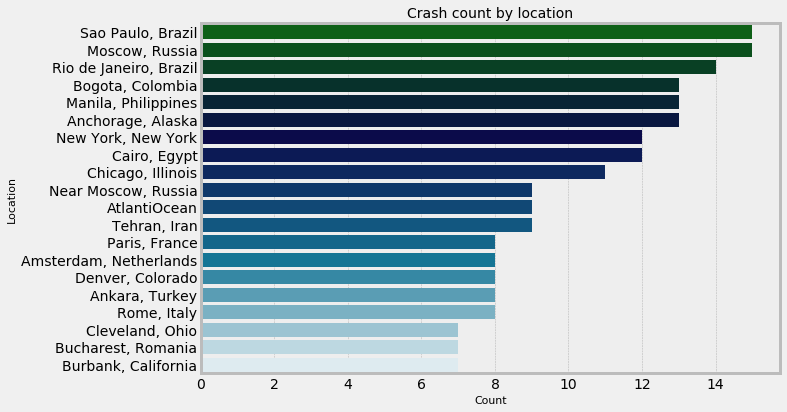

In [74]:

plt.figure(figsize=(12,6))
sns.barplot(y=dangerous_locations.index, x="Crashes in this location", data=dangerous_locations, palette="ocean", orient='h')
plt.xlabel('Count', fontsize=11)
plt.ylabel('Location', fontsize=11)
plt.title('Crash count by location', loc='Center', fontsize=14)
plt.gcf().subplots_adjust(left=0.28)
plt.savefig("Images/Top_20_Crash_by Location.png")
plt.show()

In [76]:
#Clean up time 
df["Time"] = df["Time"].replace(np.nan, "Unknown") 
df["Time"] = df["Time"].str.replace("114:20:00", "Unknown")
df["Time"] = df["Time"].str.replace("18.40", "18:40")
df["Time"] = df["Time"].str.replace("0943", "09:43")
df["Time"] = df["Time"].str.replace("12\'20", "12:20")
df["Time"] = df["Time"].str.replace("22\'08", "22:08")
df["Time"] = df["Time"].str.replace("c: ", "")
df["Time"] = df["Time"].str.replace("c:", "")
df["Time"] = df["Time"].str.replace("c", "")

#Match upper/lower case formats
df = df.applymap(lambda s:s.upper() if type(s) == str else s)

#Create new columns for month, day, year, hour, and minute
    
df['Date']=pd.to_datetime(df['Date'])
df['Day'] = df['Date'].map(lambda x: x.day)
df['Year'] = df['Date'].map(lambda x: x.year)
df['Month'] = df['Date'].map(lambda x: x.month)

#Convert Time into date_time format so I can pull hour or minute individually

df['Time'] = pd.to_datetime( df['Time'], format='H%:M%', errors = "ignore")
df['Date'] = pd.to_datetime(df['Date'], format='Y%:m%:D%', errors = 'ignore')

In [77]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Day,Year,Month
0,1908-09-17,17:18,"FORT MYER, VIRGINIA",MILITARY - U.S. ARMY,NaN,DEMONSTRATION,WRIGHT FLYER III,NaN,1,2.0,1.0,0.0,"DURING A DEMONSTRATION FLIGHT, A U.S. ARMY FLY...",17,1908,9
1,1912-07-12,6:30,"ATLANTICITY, NEW JERSEY",MILITARY - U.S. NAVY,NaN,TEST FLIGHT,DIRIGIBLE,NaN,NaN,5.0,5.0,0.0,FIRST U.S. DIRIGIBLE AKRON EXPLODED JUST OFFSH...,12,1912,7
2,1913-08-06,UNKNOWN,"VICTORIA, BRITISH COLUMBIA, CANADA",PRIVATE,-,NaN,CURTISS SEAPLANE,NaN,NaN,1.0,1.0,0.0,THE FIRST FATAL AIRPLANE ACCIDENT IN CANADA OC...,6,1913,8
3,1913-09-09,18:30,OVER THE NORTH SEA,MILITARY - GERMAN NAVY,NaN,NaN,ZEPPELIN L-1 (AIRSHIP),NaN,NaN,20.0,14.0,0.0,THE AIRSHIP FLEW INTO A THUNDERSTORM AND ENCOU...,9,1913,9
4,1913-10-17,10:30,"NEAR JOHANNISTHAL, GERMANY",MILITARY - GERMAN NAVY,NaN,NaN,ZEPPELIN L-2 (AIRSHIP),NaN,NaN,30.0,30.0,0.0,HYDROGEN GAS WHICH WAS BEING VENTED WAS SUCKED...,17,1913,10


# Crashes/Fatalities By Year

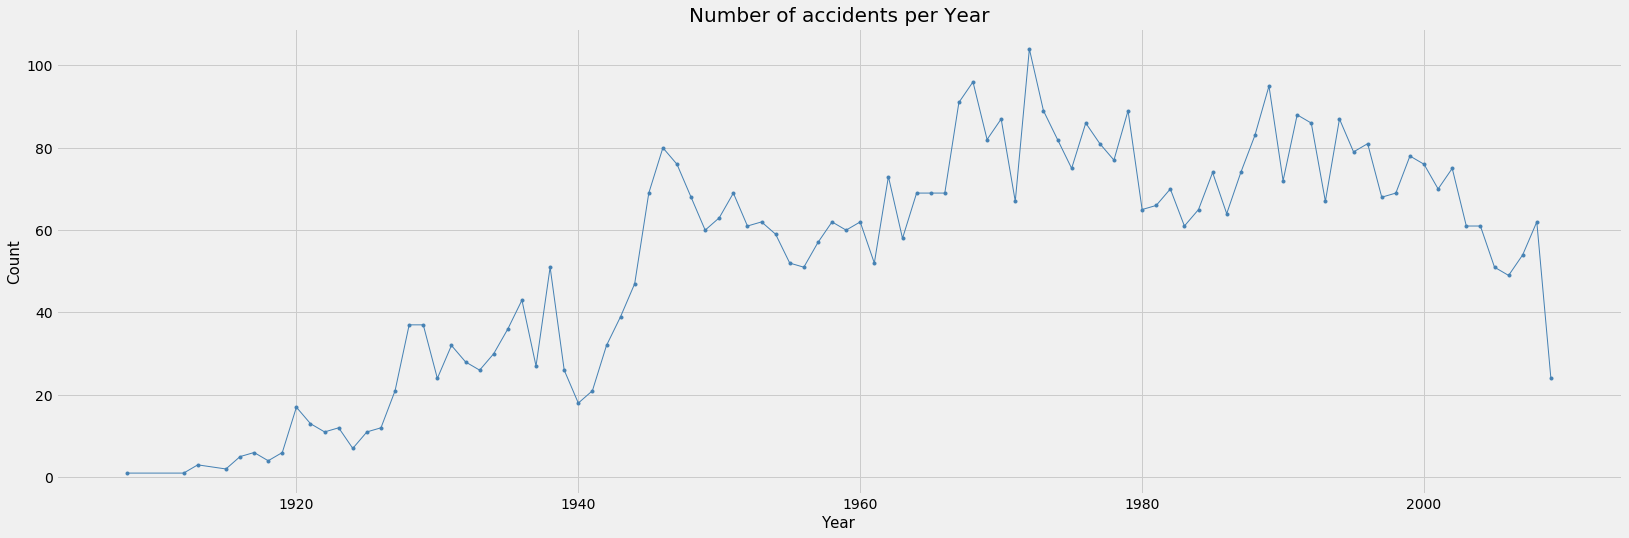

In [78]:
#Create line Chart showing Crashes per year
year_crashed = df.groupby("Year")[['Date']].count()
year_crashed = year_crashed.rename(columns={"Date" : "Count"})

#Label and format line Chart 
plt.figure(figsize=(25,8))
plt.style.use('fivethirtyeight')
plt.plot(year_crashed.index, 'Count', data=year_crashed, color='steelblue', marker = ".", linewidth=1.5)
plt.title('Number of accidents per Year', loc='Center', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.savefig("Images/Crashes_per_Year.png")
plt.show()

In [80]:
# grouping fatalities by year
by_year = df.groupby(["Year"]).sum()["Fatalities"]
yr_fatalities = by_year.rename(columns = {"Year": "Fatalities"})
df_yr_fatalities = pd.DataFrame(by_year)
df_yr_fatalities = df_yr_fatalities.reset_index()
df_yr_fatalities.sort_values(["Fatalities"], ascending = False).head()

,Year,Fatalities
60,1972,2937.0
73,1985,2670.0
61,1973,2485.0
84,1996,2386.0
62,1974,2318.0


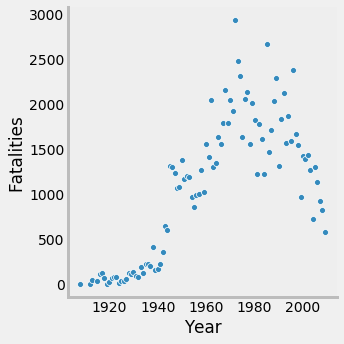

In [81]:
#All years with number of fatalities
plt_yr_fatalities = sns.relplot(x= "Year", y="Fatalities", 
                                data = df_yr_fatalities)
plt.grid()
plt.savefig("Images/plt_yr_fatalities.png")
plt.show()

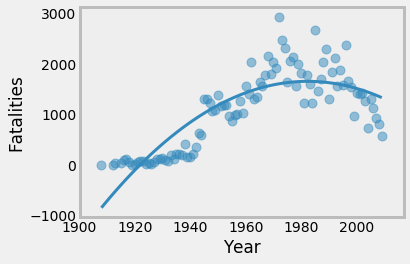

In [82]:
plt_reg_yr_fatalities = sns.regplot(x="Year", y="Fatalities", data = df_yr_fatalities,
                                    scatter_kws={"alpha" : .5, 's': 80}, 
                                    order=2, ci=None, truncate=True)
plt.grid()
plt.gcf().subplots_adjust(bottom=0.15)
plt.gcf().subplots_adjust(left=0.20)
plt.savefig("Images/plt_reg_yr_fatalities.png")
plt.show()

# Crashes/ Fatlities by Month

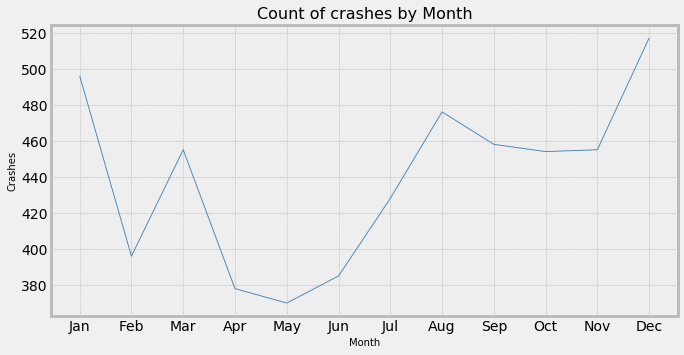

In [79]:
#Creating line chart for Crashes by Month 

plt.figure(figsize=(10,5))
plt.style.use('bmh')
plt.plot(df.groupby("Month")[['Date']].count().index, 'Date', data=df.groupby("Month")[['Date']].count(), color='steelblue',marker='', linewidth=.9)
plt.xticks(df.groupby("Month")[['Date']].count().index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month', fontsize=10)
plt.ylabel('Crashes', fontsize=10)
plt.title('Count of crashes by Month', loc='Center', fontsize=16)
plt.savefig("Images/Crashes_by_Month.png")

In [83]:
# Creating Fatality charts by month
by_month = df.groupby(["Month"]).sum()["Fatalities"]
mth_fatalities = by_month.rename(columns = {"Month": "Fatalities"})
df_mth_fatalities = pd.DataFrame(by_month)
df_mth_fatalities = df_mth_fatalities.reset_index()
df_mth_fatalities.sort_values(["Fatalities"], ascending=False)

,Month,Fatalities
11,12,10459.0
8,9,10286.0
7,8,10174.0
10,11,10033.0
6,7,9232.0
2,3,8708.0
0,1,8425.0
9,10,8388.0
1,2,7966.0
5,6,7909.0


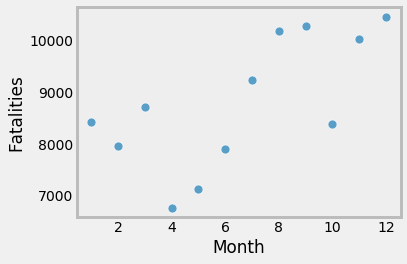

In [84]:
plt_mth_fatalities = sns.scatterplot(x="Month", y="Fatalities",
                                     alpha = .8, s = 80,
                                     data= df_mth_fatalities)
plt.grid()
plt.gcf().subplots_adjust(bottom=0.15)
plt.gcf().subplots_adjust(left=0.20)
plt.savefig("Images/plt_mth_fatalities.png")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


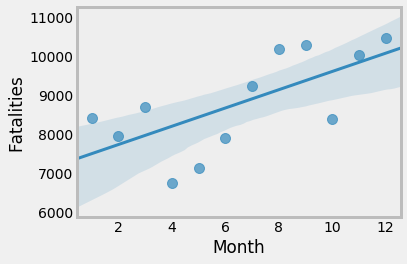

In [85]:
plt_reg_mth_fatalities = sns.regplot(x="Month", y="Fatalities",
                    scatter_kws={"alpha" : .7, 's': 100},
                    data= df_mth_fatalities)
plt.grid()
plt.gcf().subplots_adjust(bottom=0.15)
plt.gcf().subplots_adjust(left=0.20)
plt.savefig("Images/plt_reg_mth_fatalities.png")
plt.show()


In [ ]:
#Crashes are more common in the winter, with fatalities higher at the end of the year.

## Top Ten Opertaors with Crashes

Gathering information for Top 10 Operators and Airplane Types that have crashed

In [24]:
#creating data frame with just operator and type
df1 = df[['Operator', 'Type']]

In [25]:
df1.head()

,Operator,Type
0,MILITARY - U.S. ARMY,WRIGHT FLYER III
1,MILITARY - U.S. NAVY,DIRIGIBLE
2,PRIVATE,CURTISS SEAPLANE
3,MILITARY - GERMAN NAVY,ZEPPELIN L-1 (AIRSHIP)
4,MILITARY - GERMAN NAVY,ZEPPELIN L-2 (AIRSHIP)


In [26]:
# Calculating the operators that have have had the most crashes
# grouping operator and counting number of crashes
# then sorting those values to get the top 10 operators

operator_count = df1.groupby(["Operator"])['Operator'].count()
operator_count = operator_count.rename(columns={'Operator': 'Count'})
operator_count.sort_values(ascending=False).head(10)


Operator
AEROFLOT                               179
MILITARY - U.S. AIR FORCE              176
AIR FRANCE                              70
DEUTSCHE LUFTHANSA                      65
AIR TAXI                                48
CHINA NATIONAL AVIATION CORPORATION     44
UNITED AIR LINES                        44
MILITARY - U.S. ARMY AIR FORCES         43
PAN AMERICAN WORLD AIRWAYS              41
AMERICAN AIRLINES                       36
dtype: int64

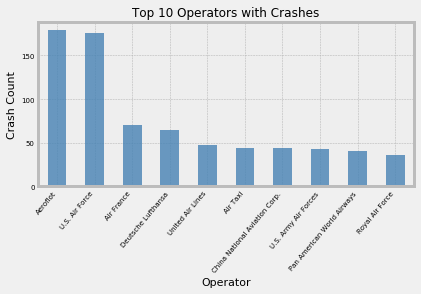

In [28]:
# Creating bar chart to reflect Top 10 Operators
xticklabels = ['Aeroflot', 'U.S. Air Force', 'Air France', 'Deutsche Lufthansa', 
               'United Air Lines', 'Air Taxi','China National Aviation Corp.', 'U.S. Army Air Forces', 
               'Pan American World Airways', 'Royal Air Force']
opr_chart= operator_count.sort_values(ascending=False)[:10].plot(kind='bar', color=('steelblue'), alpha=0.8, fontsize=7)
opr_chart.set_xlabel("Operator", fontsize=11)
opr_chart.set_ylabel("Crash Count", fontsize=11)
opr_chart.set_title("Top 10 Operators with Crashes", fontsize=12)
opr_chart.set_xticklabels(xticklabels, rotation = 50, ha="right")
plt.gcf().subplots_adjust(bottom=0.31)
plt.savefig("Images/Top_Ten_Operator_Crashes.png")
plt.show()


## Top Ten Airplane Types that have crashed

In [30]:
# Calculating the Airplane Types that have have had the most crashes
# grouping Types and counting number of crashes
# then sorting those values to get the top 10 Airplane Types

type_count = df1.groupby(["Type"])['Type'].count()
type_count = type_count.rename(columns={'Type': 'Count'})
type_count.sort_values(ascending=False).head(10)


Type
DOUGLAS DC-3                                334
DE HAVILLAND CANADA DHC-6 TWIN OTTER 300     81
DOUGLAS C-47A                                74
DOUGLAS C-47                                 62
DOUGLAS DC-4                                 40
YAKOVLEV YAK-40                              38
ANTONOV AN-26                                38
JUNKERS JU-52/3M                             37
DOUGLAS C-47B                                29
DE HAVILLAND DH-4                            28
dtype: int64

## Charting Top Ten Airplane Types that have crashed

In [31]:
# creating new dataframe with just the Operator and Type counts
updated_df1 = pd.DataFrame({
    "Operator": operator_count,
    "Types": type_count})

updated_df1.head()

,Operator,Types
A B AEROTRANSPORT,2.0,NaN
AAC-1 TOUCAN,NaN,1.0
AAXICO AIRLINES,3.0,NaN
AB AEROTRANSPORT,3.0,NaN
ABABEEL AVIAITION,1.0,NaN


In [32]:
# sorting Type values to get the top 10 that have crashed
updated_df1.sort_values(by='Types', ascending=False).head(10)

,Operator,Types
DOUGLAS DC-3,NaN,334.0
DE HAVILLAND CANADA DHC-6 TWIN OTTER 300,NaN,81.0
DOUGLAS C-47A,NaN,74.0
DOUGLAS C-47,NaN,62.0
DOUGLAS DC-4,NaN,40.0
ANTONOV AN-26,NaN,38.0
YAKOVLEV YAK-40,NaN,38.0
JUNKERS JU-52/3M,NaN,37.0
DOUGLAS C-47B,NaN,29.0
DE HAVILLAND DH-4,NaN,28.0


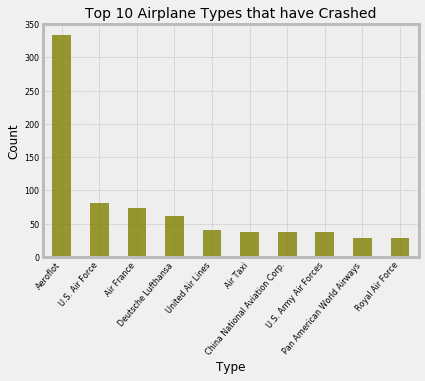

In [35]:
# Creating bar chart to reflect Top 10 Operators
xticklabels = ['DOUGLAS DC-3', 'DH CANADA DHC-6 Twin Otter', 'DOUGLAS C-47A', 'DOUGLAS C-47', 
               'DOUGLAS DC-4', 'ANTONOV AN-26','YAKOVLEV YAK-40', 'JUNKERS JU-52/3M', 
               'DOUGLAS C-47B', 'DE HAVILLAND DH-4']
type_chart= type_count.sort_values(ascending=False)[:10].plot(kind='bar', color= 'olive', alpha=0.8,fontsize=7)
type_chart.set_xlabel("Type", fontsize=11)
type_chart.set_ylabel("Crash Count", fontsize=11)
type_chart.set_title("Top 10 Airplane Types that have Crashed", fontsize=14)
type_chart.set_xticklabels(xticklabels, rotation = 50, ha="right") 
plt.gcf().subplots_adjust(bottom=0.31)
plt.savefig("Images/Top_10_Airplane_Types_Crash.png")
plt.show()

## Fatalities vs Total number of people aboard plane

In [36]:
#creating data frame with just operator, people aboard, fatalities and ground
df2 = df[['Operator', 'Aboard', 'Fatalities', 'Ground']]

In [37]:
# Grouping by Operator
df2.groupby(['Operator']).max()
df2.head(10)

,Operator,Aboard,Fatalities,Ground
0,MILITARY - U.S. ARMY,2.0,1.0,0.0
1,MILITARY - U.S. NAVY,5.0,5.0,0.0
2,PRIVATE,1.0,1.0,0.0
3,MILITARY - GERMAN NAVY,20.0,14.0,0.0
4,MILITARY - GERMAN NAVY,30.0,30.0,0.0
5,MILITARY - GERMAN NAVY,41.0,21.0,0.0
6,MILITARY - GERMAN NAVY,19.0,19.0,0.0
7,MILITARY - GERMAN ARMY,20.0,20.0,0.0
8,MILITARY - GERMAN NAVY,22.0,22.0,0.0
9,MILITARY - GERMAN NAVY,19.0,19.0,0.0


In [38]:
# Calculating the fatalities for top 10 operators 
# grouping by operator and counting number of fatalities
# then sorting those values to get the number of fatalities by Operator

fatalities_count = df2.groupby(["Operator"])['Fatalities'].sum()
fatalities_count.sort_values(ascending=False).head(15)


Operator
AEROFLOT                           7156.0
MILITARY - U.S. AIR FORCE          3717.0
AIR FRANCE                         1734.0
AMERICAN AIRLINES                  1421.0
PAN AMERICAN WORLD AIRWAYS         1302.0
MILITARY - U.S. ARMY AIR FORCES    1070.0
UNITED AIR LINES                   1021.0
AVIANCA                             945.0
TURKISH AIRLINES (THY)              891.0
INDIAN AIRLINES                     863.0
CHINA AIRLINES (TAIWAN)             847.0
AIR INDIA                           827.0
MILITARY - RUSSIAN AIR FORCE        797.0
TRANS WORLD AIRLINES                784.0
MILITARY - U.S. NAVY                767.0
Name: Fatalities, dtype: float64

In [39]:
# Calculating the total passangers aboard for top 10 operators 
# grouping by operator and counting number of passangers aboard
# then sorting those values to get the number of passangers aboard by Operator

totals_count = df2.groupby(["Operator"])['Aboard'].sum()
totals_count.sort_values(ascending=False).head(15)

Operator
AEROFLOT                           8870.0
MILITARY - U.S. AIR FORCE          4502.0
AIR FRANCE                         2874.0
PAN AMERICAN WORLD AIRWAYS         2812.0
UNITED AIR LINES                   2460.0
AMERICAN AIRLINES                  2063.0
PHILIPPINE AIR LINES               1712.0
CHINA AIRLINES (TAIWAN)            1590.0
TRANS WORLD AIRLINES               1577.0
INDIAN AIRLINES                    1453.0
KOREAN AIRLINES                    1449.0
EASTERN AIR LINES                  1360.0
GARUDA INDONESIA AIRLINES          1204.0
MILITARY - U.S. ARMY AIR FORCES    1100.0
JAPAN AIR LINES                    1094.0
Name: Aboard, dtype: float64

In [40]:
# creating new dataframe with just the Fatalities and Total Passengers counts
updated_df2 = pd.DataFrame({
    "Fatalities": fatalities_count,
    "Total Passengers": totals_count})

updated_df2.head()

,Fatalities,Total Passengers
Operator,,
A B AEROTRANSPORT,3.0,17.0
AAXICO AIRLINES,9.0,9.0
AB AEROTRANSPORT,58.0,64.0
ABABEEL AVIAITION,4.0,4.0
ABAKAN AIRLINES,3.0,19.0


In [41]:
# sorting Fatalities and total passengers values for the top 10 operators
updated_df2.sort_values(by='Fatalities', ascending=False).head(15)

,Fatalities,Total Passengers
Operator,,
AEROFLOT,7156.0,8870.0
MILITARY - U.S. AIR FORCE,3717.0,4502.0
AIR FRANCE,1734.0,2874.0
AMERICAN AIRLINES,1421.0,2063.0
PAN AMERICAN WORLD AIRWAYS,1302.0,2812.0
MILITARY - U.S. ARMY AIR FORCES,1070.0,1100.0
UNITED AIR LINES,1021.0,2460.0
AVIANCA,945.0,1071.0
TURKISH AIRLINES (THY),891.0,964.0


In [42]:
fatal_by_Op = updated_df2.groupby('Operator')[['Fatalities']].sum()
fatal_by_Op = fatal_by_Op.rename(columns={"Operator": "Fatalities"})
fatal_by_Op = fatal_by_Op.sort_values(by='Fatalities', ascending=False)
fatal_by_OpTOP = fatal_by_Op.head(10)

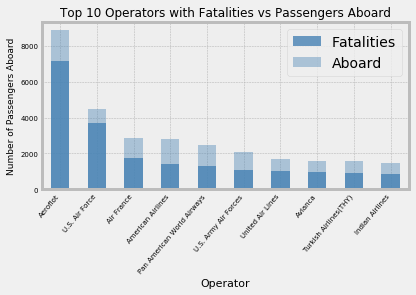

In [86]:
# Creating bar chart to reflect fatalities and total passengers for the Top 10 Operators
xticklabels = ['Aeroflot', 'U.S. Air Force', 'Air France', 'American Airlines', 
               'Pan American World Airways','U.S. Army Air Forces','United Air Lines', 'Avianca','Turkish Airlines(THY)', 
                'Indian Airlines']
fatal_chart= fatal_by_Op.sort_values(by='Fatalities', ascending=False)[:10].plot(kind='bar',color='steelblue', alpha=0.8, fontsize=7)
fatal_chart= totals_count.sort_values( ascending=False)[:10].plot(kind='bar',color = 'steelblue', alpha=0.4)
fatal_chart.set_xlabel("Operator", fontsize=11)
fatal_chart.set_ylabel("Number of Passengers Aboard", fontsize=9)
fatal_chart.set_title("Top 10 Operators with Fatalities vs Passengers Aboard", fontsize=12)
fatal_chart.set_xticklabels(xticklabels, rotation = 50, ha="right") 
plt.legend()
plt.gcf().subplots_adjust(bottom=0.30)
plt.gcf().subplots_adjust(left=0.10)
plt.savefig("Images/Top_10_Fatalities_vs_Total_Aboard.png")
plt.show()

In [87]:
#Military vs. Commercial comparison

military_df = df.copy()
military_df["crashes"]= military_df.Operator.str.contains('MILITARY')
military_df = military_df.groupby('crashes')[['crashes']].count()
military_df.index = ['Commercial', 'Military']

In [88]:
military_df

,crashes
Commercial,4469
Military,781


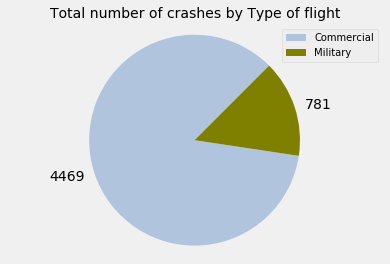

In [89]:
#creating Pie Chart to show military vs commerical crashes
plt.pie(military_df.crashes, colors = ['lightsteelblue', 'olive'], labels=military_df.crashes, startangle=45)
plt.legend(military_df.index, loc="best", fontsize=10)
plt.axis('equal')
plt.title('Total number of crashes by Type of flight', loc='Center', fontsize=14)
plt.savefig("Images/Military_vs_Commerical_Total_Crashes.png")
plt.show()

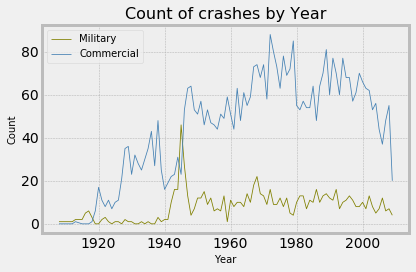

In [90]:
#Military vs Commercial crashes by year
Temp = df.copy()
Temp['Military'] = Temp.Operator.str.contains('MILITARY')
Temp['Commercial'] = Temp.Military == False
Temp = Temp.loc[:, ['Year', 'Military', 'Commercial']]
Temp = Temp.groupby('Year')[['Military', 'Commercial']].aggregate(np.count_nonzero)

#creating line Chart to show military vs commerical crashes
plt.plot(Temp.index, 'Military', data=Temp, color='olive', linewidth=.8)
plt.plot(Temp.index, 'Commercial', data=Temp, color='steelblue', linewidth=.8)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of crashes by Year', loc='Center', fontsize=16)
plt.tight_layout()
plt.savefig("Images/Military_vs_Commerical-Crashes_per_year.png")
plt.show()

# Drop NaN values

In [91]:
df3 = df[['Year', 'Operator', 'Aboard', 'Fatalities', 'Summary']].dropna(subset=['Operator', 'Aboard', 'Fatalities', 'Summary'])
df3.head(5)

,Year,Operator,Aboard,Fatalities,Summary
0,1908,MILITARY - U.S. ARMY,2.0,1.0,"DURING A DEMONSTRATION FLIGHT, A U.S. ARMY FLY..."
1,1912,MILITARY - U.S. NAVY,5.0,5.0,FIRST U.S. DIRIGIBLE AKRON EXPLODED JUST OFFSH...
2,1913,PRIVATE,1.0,1.0,THE FIRST FATAL AIRPLANE ACCIDENT IN CANADA OC...
3,1913,MILITARY - GERMAN NAVY,20.0,14.0,THE AIRSHIP FLEW INTO A THUNDERSTORM AND ENCOU...
4,1913,MILITARY - GERMAN NAVY,30.0,30.0,HYDROGEN GAS WHICH WAS BEING VENTED WAS SUCKED...


# Military DataFrame

In [96]:
# Creating new dataframe which selects Military operators
df_military = df3[df3["Operator"].str.contains("MILITARY")]
df_military.head(15)

,Year,Operator,Aboard,Fatalities,Summary
0,1908,MILITARY - U.S. ARMY,2.0,1.0,"DURING A DEMONSTRATION FLIGHT, A U.S. ARMY FLY..."
1,1912,MILITARY - U.S. NAVY,5.0,5.0,FIRST U.S. DIRIGIBLE AKRON EXPLODED JUST OFFSH...
3,1913,MILITARY - GERMAN NAVY,20.0,14.0,THE AIRSHIP FLEW INTO A THUNDERSTORM AND ENCOU...
4,1913,MILITARY - GERMAN NAVY,30.0,30.0,HYDROGEN GAS WHICH WAS BEING VENTED WAS SUCKED...
5,1915,MILITARY - GERMAN NAVY,41.0,21.0,CRASHED INTO TREES WHILE ATTEMPTING TO LAND AF...
6,1915,MILITARY - GERMAN NAVY,19.0,19.0,"EXPLODED AND BURNED NEAR NEUWERK ISLAND, WHEN..."
7,1916,MILITARY - GERMAN ARMY,20.0,20.0,"CRASHED NEAR THE BLACK SEA, CAUSE UNKNOWN."
8,1916,MILITARY - GERMAN NAVY,22.0,22.0,SHOT DOWN BY BRITISH AIRCRAFT CRASHING IN FLAMES.
9,1916,MILITARY - GERMAN NAVY,19.0,19.0,SHOT DOWN IN FLAMES BY THE BRITISH 39TH HOME D...
10,1916,MILITARY - GERMAN ARMY,28.0,27.0,CRASHED IN A STORM.


In [97]:
m_fatalities_count = df_military.groupby(["Year"])['Fatalities'].sum()
m_totals_count = df_military.groupby(["Year"])['Aboard'].sum()
m_fatality_rate = m_fatalities_count / m_totals_count
m_fatalities_count.sum()/m_totals_count.sum()

0.9159840062414667

In [98]:
df2_military = pd.DataFrame({"Fatality Rate": m_fatality_rate})
df2_military.head(10)

,Fatality Rate
Year,
1908,0.500000
1912,1.000000
1913,0.880000
1915,0.666667
1916,0.990826
1917,1.000000
1918,1.000000
1921,1.000000
1922,0.755556


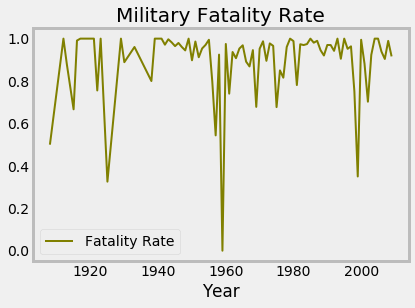

In [101]:
df2_military = pd.DataFrame({"Fatality Rate": m_fatality_rate})
military_chart = df2_military.plot(kind = "line", color='olive')
plt.title("Military Fatality Rate")
plt.grid()
plt.savefig("Images/Military_Fatalities.png")


In [102]:
df2_military = pd.DataFrame({"Fatality Rate": m_fatality_rate})
df2_military = df2_military.reset_index()
df2_military.head(5)


,Year,Fatality Rate
0,1908,0.500000
1,1912,1.000000
2,1913,0.880000
3,1915,0.666667
4,1916,0.990826


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


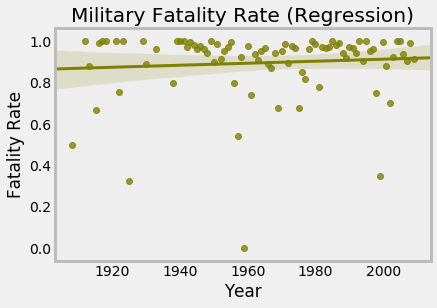

In [103]:
sns.regplot(x = "Year" , y = "Fatality Rate", data = df2_military, color = "olive")
plt.title("Military Fatality Rate (Regression)")
plt.grid()
plt.savefig("Images/Military_Fatalities_Regression.png")


# Commercial DataFrame

In [104]:
# Creating new dataframe which selects Non-Military operators
df_commercial = df3[df3["Operator"].str.contains("MILITARY") == False]

In [105]:
c_fatalities_count = df_commercial.groupby(["Year"])['Fatalities'].sum()
c_totals_count = df_commercial.groupby(["Year"])['Aboard'].sum()
c_fatality_rate = c_fatalities_count / c_totals_count
c_fatalities_count.sum()/c_totals_count.sum()

0.6946674765157629

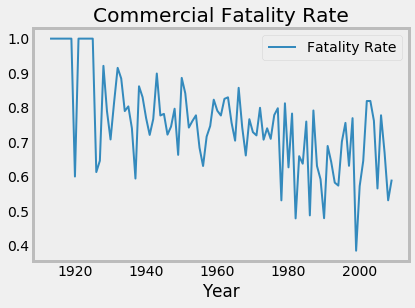

In [106]:
df2_commercial = pd.DataFrame({"Fatality Rate": c_fatality_rate})
commercial_chart = df2_commercial.plot(kind = "line")
plt.title("Commercial Fatality Rate")
plt.grid()
plt.savefig("Images/Commercial_Fatalities.png")

In [108]:
df2_commercial = pd.DataFrame({"Fatality Rate": c_fatality_rate})
df2_commercial = df2_commercial.reset_index()

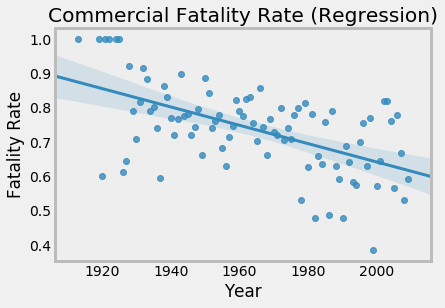

In [109]:
sns.regplot(x = "Year" , y = "Fatality Rate", data = df2_commercial)
plt.title("Commercial Fatality Rate (Regression)")
plt.grid()
plt.savefig("Images/Commercial_Fatalities_Regression.png")

# Creating Dangerous Location Word Cloud


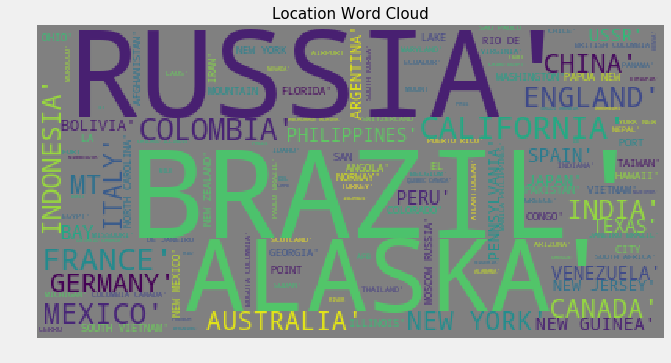

In [110]:
# Creating a word cloud based on most dangerous locations.
list = str(df.Location.tolist())

stopwords = set(STOPWORDS)
stopwords.add("off")
stopwords.add("Near")
stopwords.add("Over")
stopwords.add("of")
stopwords.add("on")
stopwords.add("'")
stopwords.add("-")
stopwords.add("\"")
stopwords.add(",")
stopwords.add(".")
stopwords.add(" -")
stopwords.add("Island")
wc = WordCloud(background_color = "grey", max_words= 2500, stopwords=stopwords)
wc.generate(list)

plt.figure(figsize=(10,10))
plt.title('Location Word Cloud', loc='Center', fontsize=15)
plt.imshow(wc) 
plt.axis("off")
plt.savefig("Images/Crashes_by_location_Visualization.png")
plt.show()

# Operator Fatalities by Year


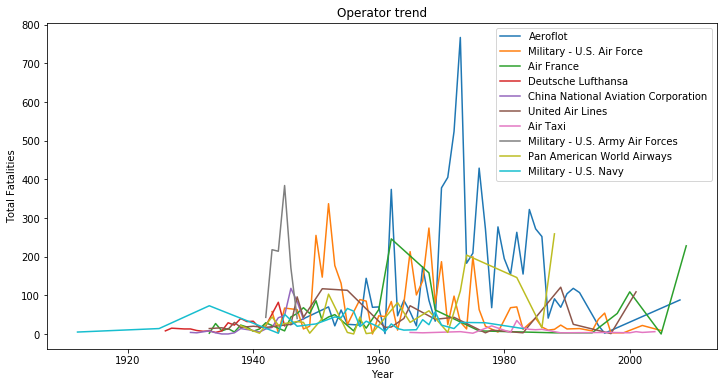

In [255]:
operator_count = Counter(df['Operator'].dropna().tolist()).most_common(10)
operator_list = [operator[0] for operator in operator_count] 
operator_trend = df[['Operator','Year','Fatalities']].groupby(['Operator','Year']).agg(['sum','count'])
operator_trend = operator_trend['Fatalities'].reset_index()

fig,ax = plt.subplots(figsize=(12,6))
plt.title('Operator trend')
plt.ylabel('Total Fatalities')
plt.xlabel('Year')
for operator in operator_list:
    operator_trend[operator_trend['Operator'] == operator].plot(x = 'Year',
                                                                y = 'sum',
                                                                linewidth=1.5,
                                                                ax=ax,
                                                                label=operator)